# 

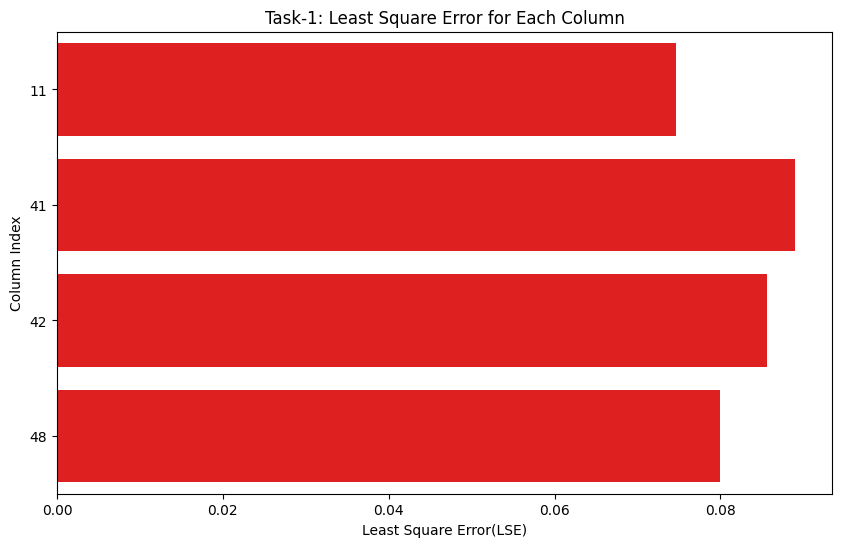

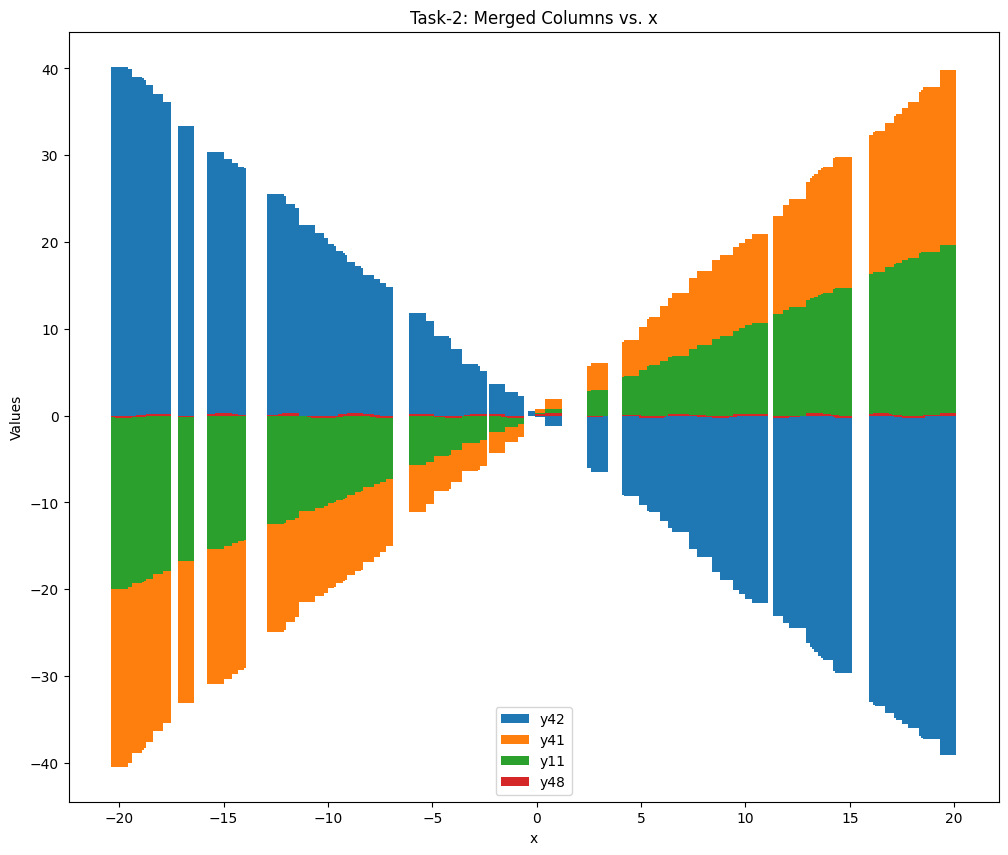

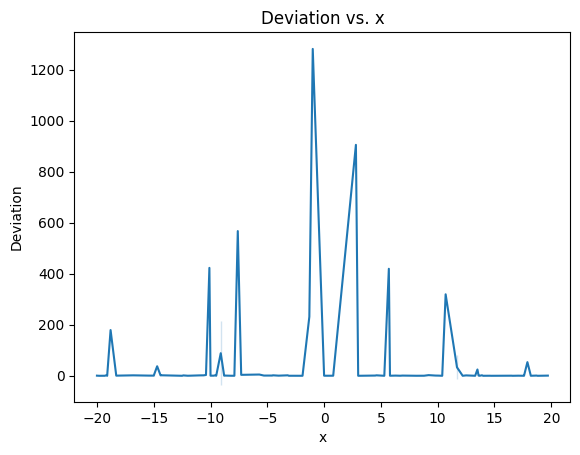

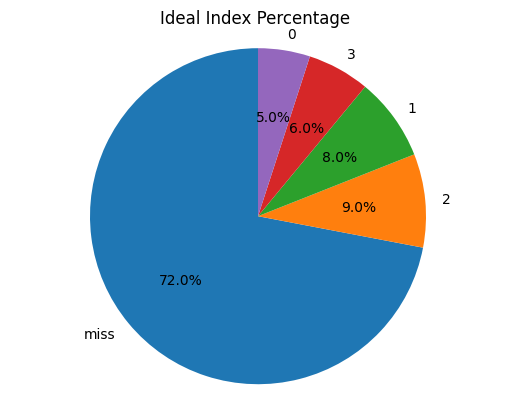

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load whole data which is given
train = pd.read_excel("Dataset.xlsx", sheet_name="train")
test = pd.read_excel("Dataset.xlsx", sheet_name="test")
ideal = pd.read_excel("Dataset.xlsx", sheet_name="ideal")

#Task_1: Determine LSE for each column
#Creating two empty lists
a1 = []
least_sq = []
for m in range(1, len(train.columns)):
    #new empty list
    l_se = []
    for n in range(1, len(ideal.columns)):
        #add new list
        m_se = 0
        for k in range(len(train)):
            p1 = train.iloc[k, m]
            m1 = ideal.iloc[k, n] 
            m_se = m_se + ((p1 - m1) ** 2)
         #appending the values
        l_se.append(m_se / len(train))
    #storing minimum value of least sqaure square
    minimum_l = min(l_se)
    index = l_se.index(minimum_l)
    a1.append(index + 1)
    least_sq.append(minimum_l)
    
task_1 = pd.DataFrame({"Column_name": a1, "leastsq_error": least_sq})

#Task_2: Ideal function with test data (merging)
#New empty list 
ideals = []
for m in range(0, len(task_1)):
    ideals.append(ideal[["x", f"y{str(task_1.iloc[m, 0])}"]])
    
for m in ideals:
    test = test.merge(m, on='x', how='left')
    
#Find Deviation and Ideal index
#Create two new empty lists
id_index = []
deviation = []

for m in range(len(test)):
    mse_li = [] # create list
    for n in range(2, len(test.columns)):
        w1 = test.iloc[m, 1]
        w2 = test.iloc[m, n]
        m_se = ((w1 - w2) ** 2) 
        mse_li.append(m_se)
    minimum_l = min(mse_li)
    
    if minimum_l < np.sqrt(2) * 0.089005:
        deviation.append(minimum_l)
        index = mse_li.index(minimum_l)
        id_index.append(index)
        
    else:
        deviation.append(minimum_l)
        id_index.append('miss')
        
#two different columns
test["Deviation"] = deviation
test["Ideal Index"] = id_index

#Data Visulaization

#for Task_1
# Data Visualization

# Task-1 Visualization
plt.figure(figsize=(10, 6)) 
sns.barplot(data=task_1, y="Column_name", x="leastsq_error", color='red', orient='h')
plt.title("Task-1: Least Square Error for Each Column")
plt.xlabel("Least Square Error(LSE)")  
plt.ylabel("Column Index")
plt.show()

# Task-2 Visualization
plt.figure(figsize=(12, 10))

for i in range(0, len(task_1)):
    plt.bar(test["x"], test[f"y{task_1.iloc[i, 0]}"], label=f"y{task_1.iloc[i, 0]}")

plt.legend()
plt.title("Task-2: Merged Columns vs. x")
plt.xlabel("x")
plt.ylabel("Values") 
plt.show()

# Deviation Visualization
sns.lineplot(data=test, x="x", y="Deviation", errorbar="sd")
plt.title("Deviation vs. x")
plt.xlabel("x")
plt.ylabel("Deviation")
plt.show()

# Ideal Index Visualization
counts = test["Ideal Index"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Ideal Index Percentage ")
plt.axis('equal')
plt.show()